In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Set the seaborn style
sns.set_theme(style="whitegrid")

In [7]:
# Load the dataset

data = pd.read_csv("result_1s.csv")

# add id column
data['test_id'] = data.index

data.head()


,P2B_QoS,A2B_QoS,Delay_(ms),Instance_Count,Total_Messages_Received,Expected_Messages_Received,Message_Loss_Rate_(%),Out_of_Order_Message_Rate_(%),Median_Inter_Message_Gap_(ms),msg_rate_(msg/s),test_id
0,0,0,0,1,7976204,7976205,0.00,0.00,0.0,132750.882,0
1,0,0,0,2,13074332,13076536,0.02,16.83,0.0,217803.892,1
2,0,0,0,3,18133985,18139894,0.03,31.19,0.0,302192.791,2
3,0,0,0,4,23086986,23571582,2.06,45.16,0.0,383135.617,3
4,0,0,0,5,22706889,28824385,21.22,56.40,0.0,376934.131,4


Correlation between test setup parameters with 'msg_rate_(msg/s)':

                msg_rate_(msg/s)
P2B_QoS                -0.250814
A2B_QoS                -0.028545
Delay_(ms)             -0.532179
Instance_Count          0.137946


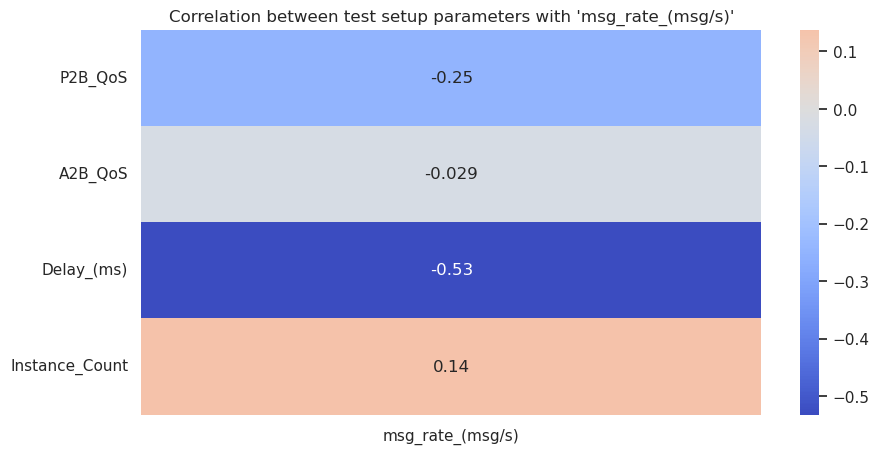

In [18]:
# Define the function to generate the correlation matrix
def generate_correlation_matrix(data, target_column):
  # List of columns to calculate correlation with
  columns_to_compare = ['P2B_QoS', 'A2B_QoS', 'Delay_(ms)', 'Instance_Count']
  # Check if the target column is in the dataframe
  if target_column not in data.columns:
    raise ValueError(f"Column '{target_column}' not found in the data.")
  # Calculate the correlation matrix
  correlation_matrix = data[columns_to_compare + [target_column]].corr()
  # Extract the correlations with the target column
  target_correlation = correlation_matrix[[target_column]].drop(target_column)
  return target_correlation

# Example usage
target_column = 'msg_rate_(msg/s)'
correlation_matrix = generate_correlation_matrix(data, target_column)

print(f"Correlation between test setup parameters with '{target_column}':\n")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(f"Correlation between test setup parameters with '{target_column}'")
plt.show()


/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


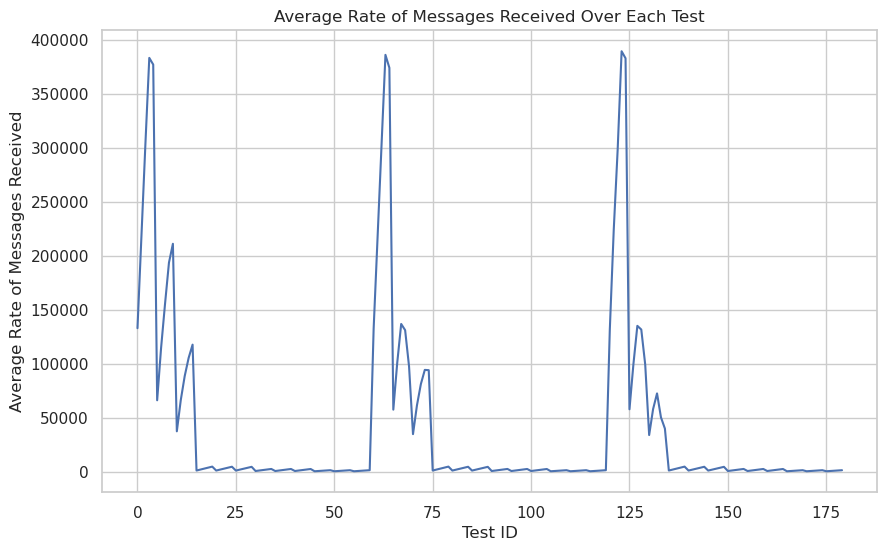

Max msg_rate_(msg/s): 389284.909


In [35]:
# Line Plot for Average Rate of Messages Received

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x="test_id", y="msg_rate_(msg/s)", data=data)
plt.title("Average Rate of Messages Received Over Each Test")
plt.xlabel("Test ID")
plt.ylabel("Average Rate of Messages Received")
plt.show()

print("Max msg_rate_(msg/s):", data['msg_rate_(msg/s)'].max())




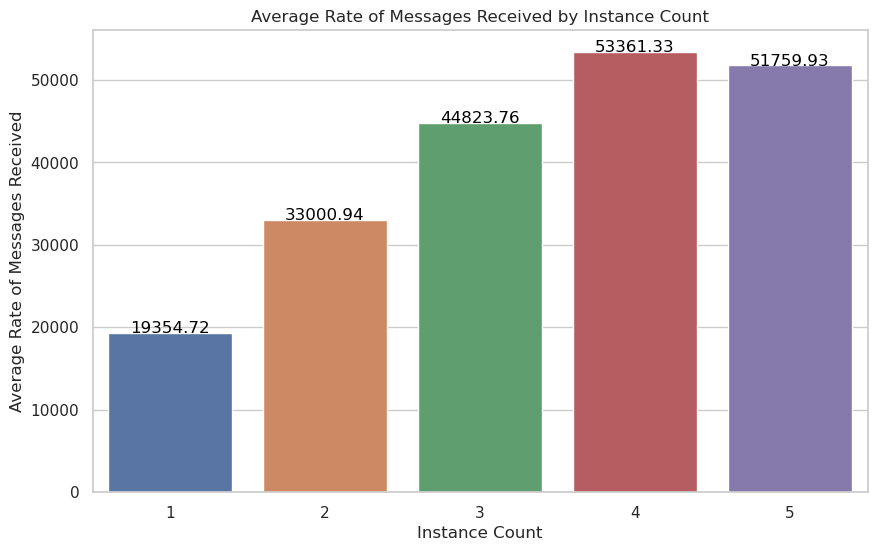

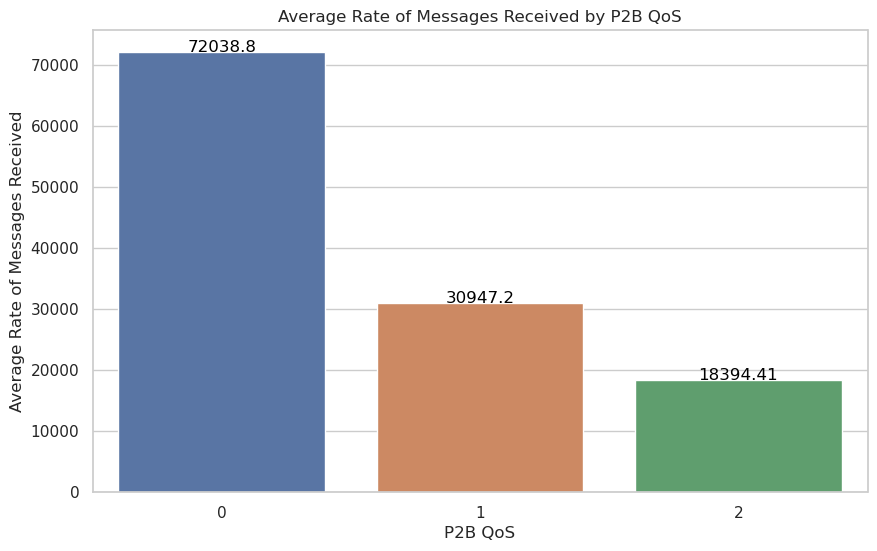

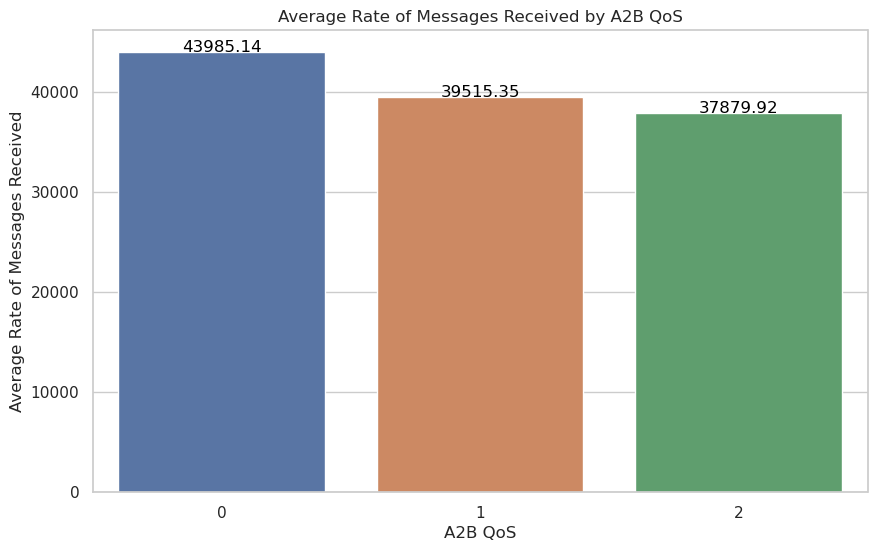

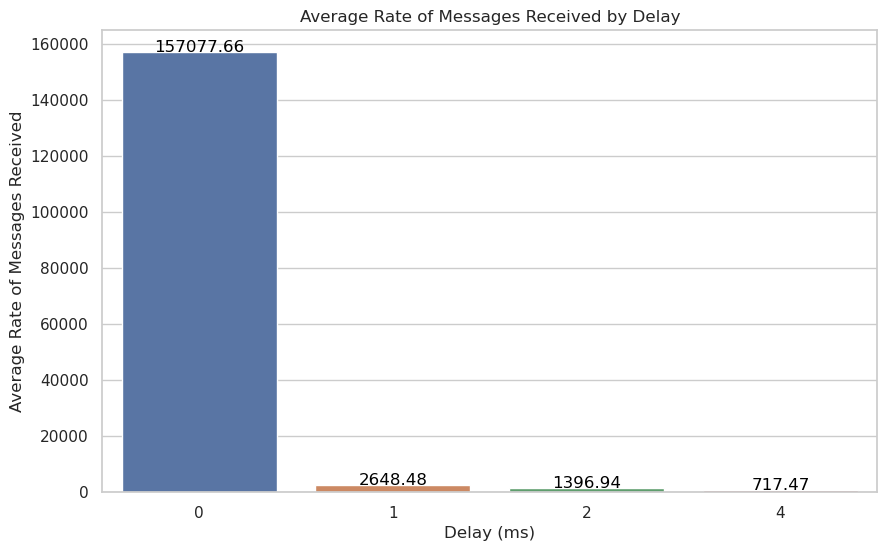

In [28]:
# Aggregate the data by Instance_Count
aggregated_data = data.groupby('Instance_Count').agg({
    'Total_Messages_Received': 'mean',
    'Expected_Messages_Received': 'mean',
    'Message_Loss_Rate_(%)': 'mean',
    'Out_of_Order_Message_Rate_(%)': 'mean',
    'Median_Inter_Message_Gap_(ms)': 'mean',
    'msg_rate_(msg/s)': 'mean',
}).reset_index()
# Bar Plot for Average Rate of Messages Received
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Instance_Count", y="msg_rate_(msg/s)", data=aggregated_data)
plt.title("Average Rate of Messages Received by Instance Count")
plt.xlabel("Instance Count")
plt.ylabel("Average Rate of Messages Received")
# Add the actual numbers above the bars
for index, row in aggregated_data.iterrows():
  barplot.text(row.name, row['msg_rate_(msg/s)'], round(row['msg_rate_(msg/s)'], 2), color='black', ha="center")
plt.show()


# Aggregate the data by QoS
aggregated_data = data.groupby('P2B_QoS').agg({
  'Total_Messages_Received': 'mean',
  'Expected_Messages_Received': 'mean',
  'Message_Loss_Rate_(%)': 'mean',
  'Out_of_Order_Message_Rate_(%)': 'mean',
  'Median_Inter_Message_Gap_(ms)': 'mean',
  'msg_rate_(msg/s)': 'mean',
}).reset_index()
# Bar Plot for Average Rate of Messages Received
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="P2B_QoS", y="msg_rate_(msg/s)", data=aggregated_data)
plt.title("Average Rate of Messages Received by P2B QoS")
plt.xlabel("P2B QoS")
plt.ylabel("Average Rate of Messages Received")
# Add the actual numbers above the bars
for index, row in aggregated_data.iterrows():
  barplot.text(row.name, row['msg_rate_(msg/s)'], round(row['msg_rate_(msg/s)'], 2), color='black', ha="center")
plt.show()


# Aggregate the data by QoS
aggregated_data = data.groupby('A2B_QoS').agg({
  'Total_Messages_Received': 'mean',
  'Expected_Messages_Received': 'mean',
  'Message_Loss_Rate_(%)': 'mean',
  'Out_of_Order_Message_Rate_(%)': 'mean',
  'Median_Inter_Message_Gap_(ms)': 'mean',
  'msg_rate_(msg/s)': 'mean',
}).reset_index()
# Bar Plot for Average Rate of Messages Received
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="A2B_QoS", y="msg_rate_(msg/s)", data=aggregated_data)
plt.title("Average Rate of Messages Received by A2B QoS")
plt.xlabel("A2B QoS")
plt.ylabel("Average Rate of Messages Received")
# Add the actual numbers above the bars
for index, row in aggregated_data.iterrows():
  barplot.text(row.name, row['msg_rate_(msg/s)'], round(row['msg_rate_(msg/s)'], 2), color='black', ha="center")
plt.show()

# Aggregate the data by Delay
aggregated_data = data.groupby('Delay_(ms)').agg({
  'Total_Messages_Received': 'mean',
  'Expected_Messages_Received': 'mean',
  'Message_Loss_Rate_(%)': 'mean',
  'Out_of_Order_Message_Rate_(%)': 'mean',
  'Median_Inter_Message_Gap_(ms)': 'mean',
  'msg_rate_(msg/s)': 'mean',
}).reset_index()
# Bar Plot for Average Rate of Messages Received
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Delay_(ms)", y="msg_rate_(msg/s)", data=aggregated_data)
plt.title("Average Rate of Messages Received by Delay")
plt.xlabel("Delay (ms)")
plt.ylabel("Average Rate of Messages Received")
# Add the actual numbers above the bars
for index, row in aggregated_data.iterrows():
  barplot.text(row.name, row['msg_rate_(msg/s)'], round(row['msg_rate_(msg/s)'], 2), color='black', ha="center")
plt.show()


Index(['P2B_QoS', 'A2B_QoS', 'Delay_(ms)', 'Instance_Count',
       'Total_Messages_Received', 'Expected_Messages_Received',
       'Message_Loss_Rate_(%)', 'Out_of_Order_Message_Rate_(%)',
       'Median_Inter_Message_Gap_(ms)', 'msg_rate_(msg/s)', 'test_id',
       'Configuration'],
      dtype='object')


/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


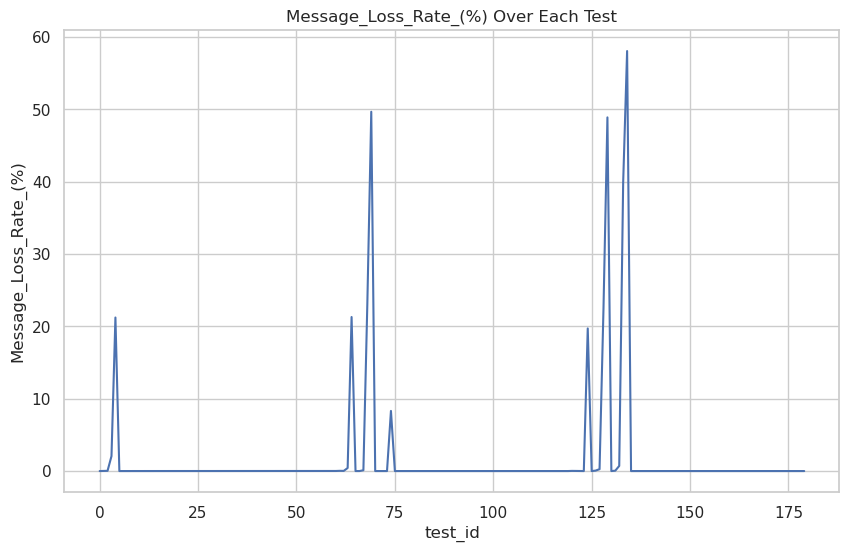

Max Message_Loss_Rate_(%): 58.05
Min Message_Loss_Rate_(%): 0.0


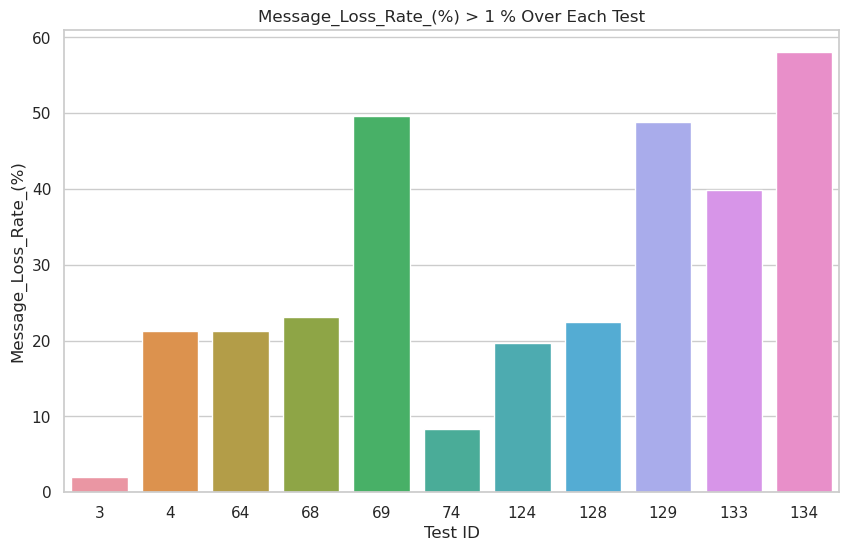

In [53]:
# Plot the data

print(data.columns)

x = "test_id"
y = "Message_Loss_Rate_(%)"
# y = "Out_of_Order_Message_Rate_(%)"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.title(f"{y} Over Each Test")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

print(f"Max {y}:", data[y].max())
print(f"Min {y}:", data[y].min())

# select only the rows with Message_Loss_Rate_(%) > threshold
threshold = 1
data_loss = data[data[y] > threshold]

# Plot the data
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=x, y=y, data=data_loss)
plt.title(f"{y} > {threshold} % Over Each Test")
plt.xlabel("Test ID")
plt.ylabel(y)
plt.show()


Correlation between test setup parameters with 'Message_Loss_Rate_(%)':

                Message_Loss_Rate_(%)
P2B_QoS                      0.035644
A2B_QoS                      0.140977
Delay_(ms)                  -0.258261
Instance_Count               0.264377


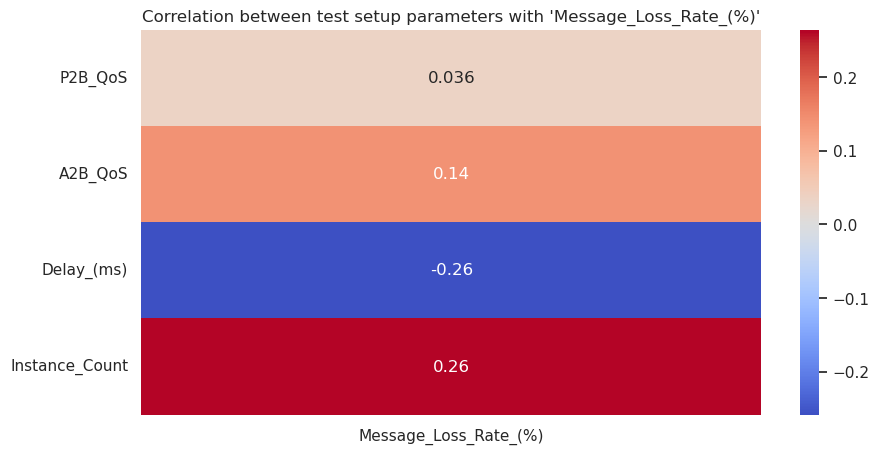

In [47]:
target_column = 'Message_Loss_Rate_(%)'
correlation_matrix = generate_correlation_matrix(data, target_column)

print(f"Correlation between test setup parameters with '{target_column}':\n")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(f"Correlation between test setup parameters with '{target_column}'")
plt.show()

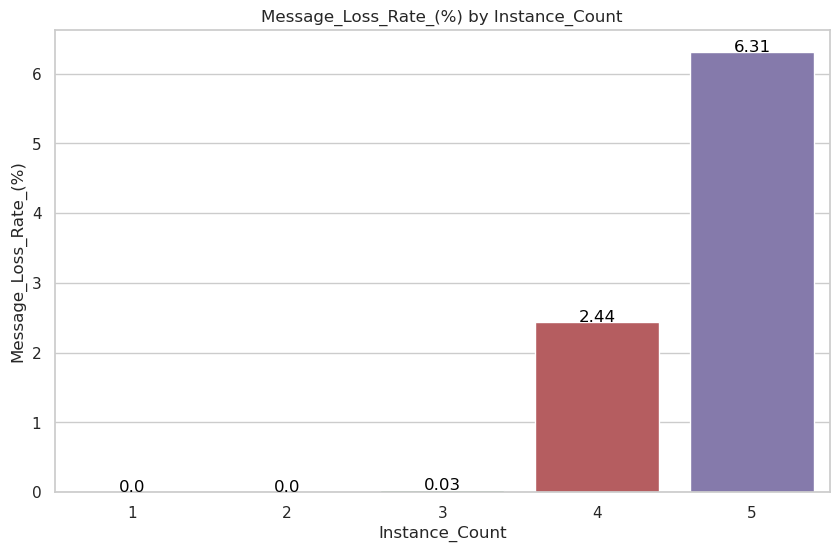

In [48]:
x = "Instance_Count"
y = "Message_Loss_Rate_(%)"

# Aggregate the data by Delay
aggregated_data = data.groupby(x).agg({
  'Total_Messages_Received': 'mean',
  'Expected_Messages_Received': 'mean',
  'Message_Loss_Rate_(%)': 'mean',
  'Out_of_Order_Message_Rate_(%)': 'mean',
  'Median_Inter_Message_Gap_(ms)': 'mean',
  'msg_rate_(msg/s)': 'mean',
}).reset_index()
# Bar Plot for Average Rate of Messages Received
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=x, y=y, data=aggregated_data)
plt.title(f"{y} by {x}")
plt.xlabel(x)
plt.ylabel(y)
# Add the actual numbers above the bars
for index, row in aggregated_data.iterrows():
  barplot.text(row.name, row[y], round(row[y], 2), color='black', ha="center")
plt.show()


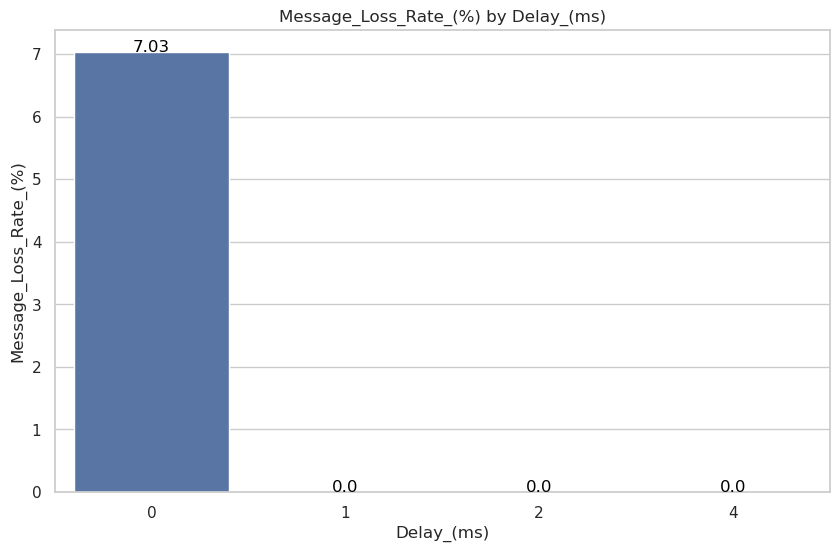

In [49]:
x = "Delay_(ms)"
y = "Message_Loss_Rate_(%)"

# Aggregate the data by Delay
aggregated_data = data.groupby(x).agg({
  'Total_Messages_Received': 'mean',
  'Expected_Messages_Received': 'mean',
  'Message_Loss_Rate_(%)': 'mean',
  'Out_of_Order_Message_Rate_(%)': 'mean',
  'Median_Inter_Message_Gap_(ms)': 'mean',
  'msg_rate_(msg/s)': 'mean',
}).reset_index()
# Bar Plot for Average Rate of Messages Received
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=x, y=y, data=aggregated_data)
plt.title(f"{y} by {x}")
plt.xlabel(x)
plt.ylabel(y)
# Add the actual numbers above the bars
for index, row in aggregated_data.iterrows():
  barplot.text(row.name, row[y], round(row[y], 2), color='black', ha="center")
plt.show()

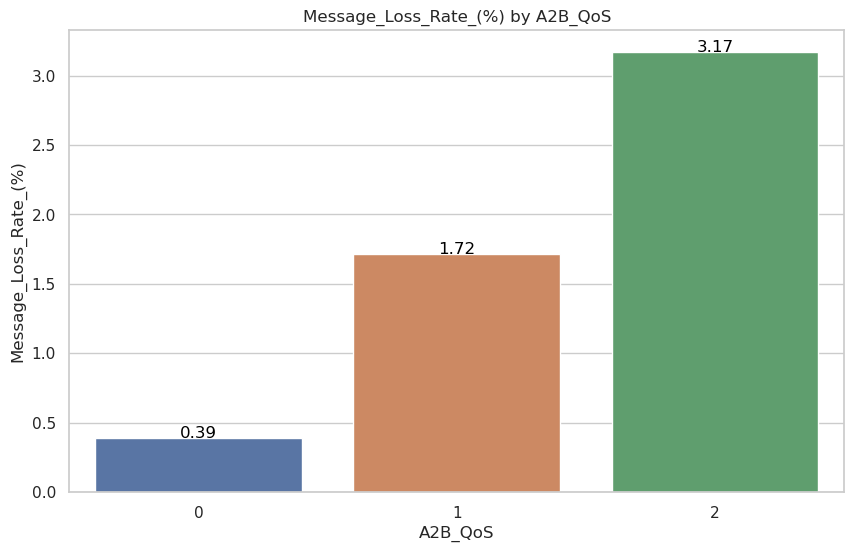

In [50]:
x = "A2B_QoS"
y = "Message_Loss_Rate_(%)"

# Aggregate the data by Delay
aggregated_data = data.groupby(x).agg({
  'Total_Messages_Received': 'mean',
  'Expected_Messages_Received': 'mean',
  'Message_Loss_Rate_(%)': 'mean',
  'Out_of_Order_Message_Rate_(%)': 'mean',
  'Median_Inter_Message_Gap_(ms)': 'mean',
  'msg_rate_(msg/s)': 'mean',
}).reset_index()
# Bar Plot for Average Rate of Messages Received
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=x, y=y, data=aggregated_data)
plt.title(f"{y} by {x}")
plt.xlabel(x)
plt.ylabel(y)
# Add the actual numbers above the bars
for index, row in aggregated_data.iterrows():
  barplot.text(row.name, row[y], round(row[y], 2), color='black', ha="center")
plt.show()

/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


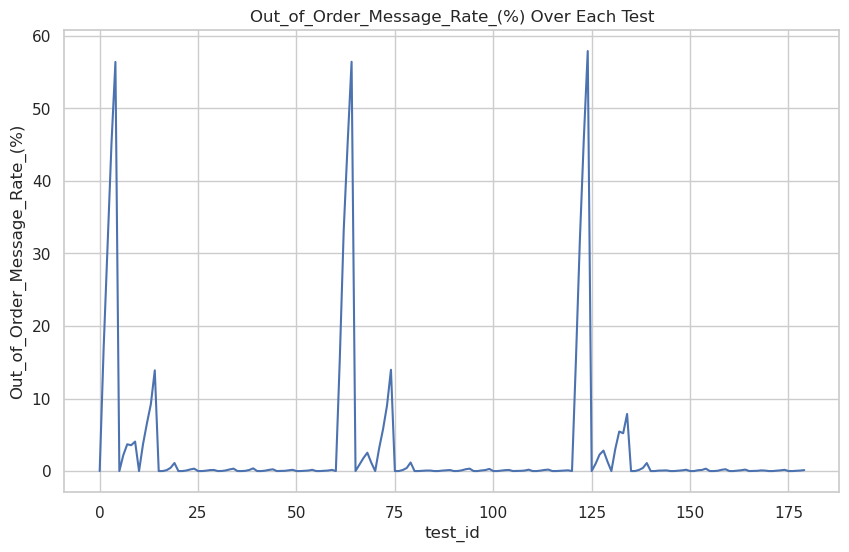

Max Out_of_Order_Message_Rate_(%): 57.9
Min Out_of_Order_Message_Rate_(%): 0.0


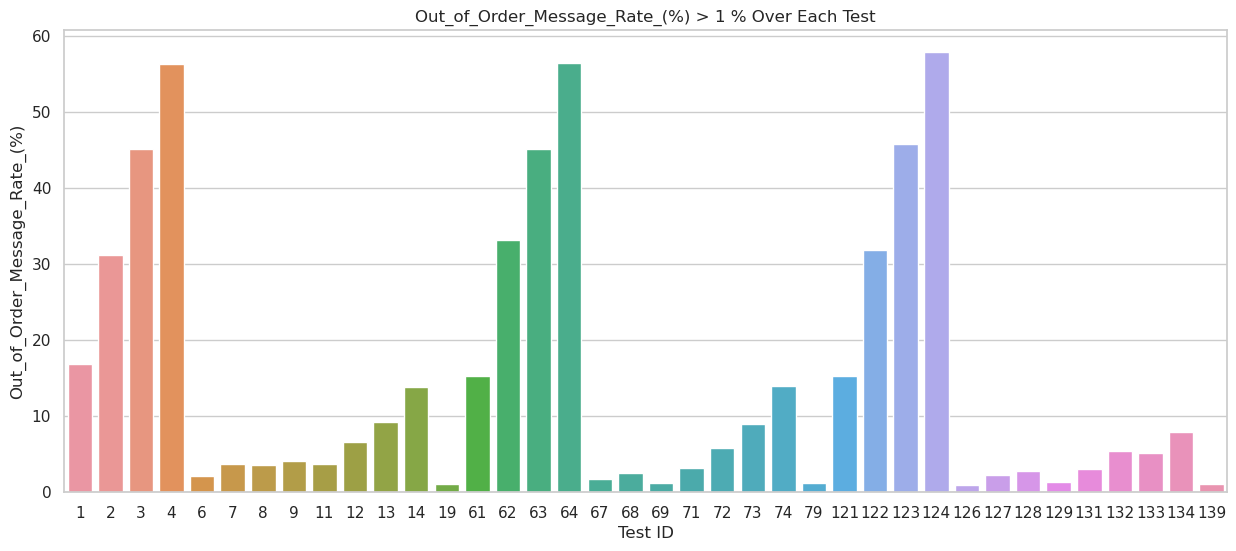

Correlation between test setup parameters with 'Out_of_Order_Message_Rate_(%)':

                Out_of_Order_Message_Rate_(%)
P2B_QoS                             -0.245926
A2B_QoS                             -0.011516
Delay_(ms)                          -0.363278
Instance_Count                       0.213134


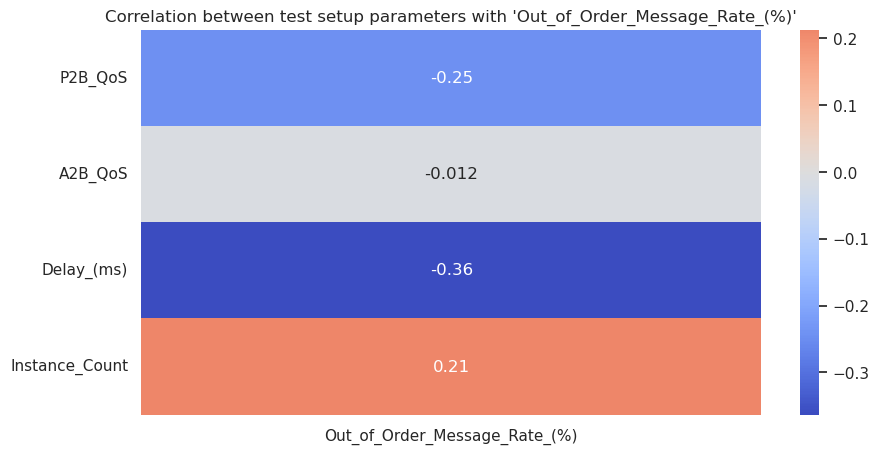

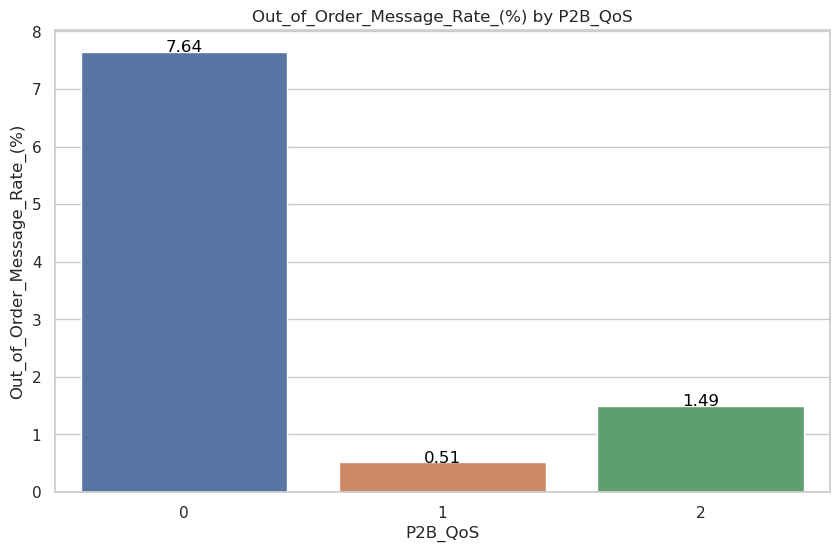

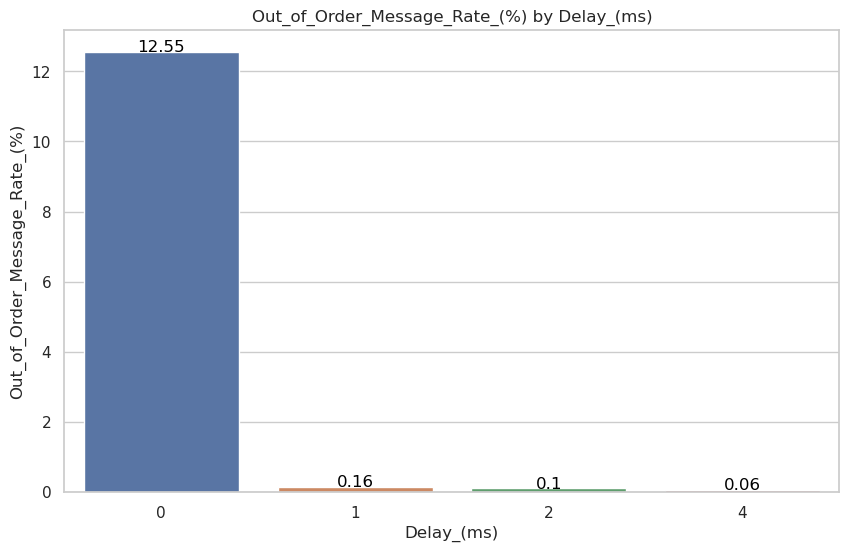

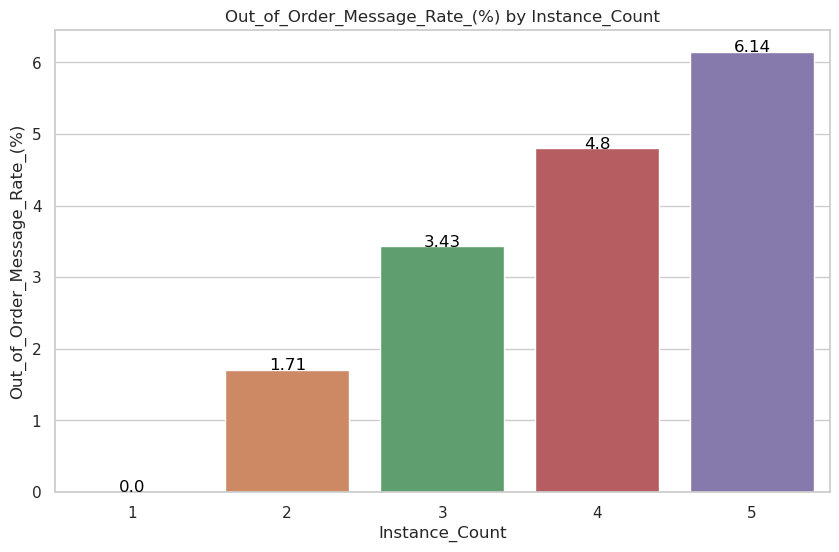

In [56]:
x = "test_id"
y = "Out_of_Order_Message_Rate_(%)"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.title(f"{y} Over Each Test")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

print(f"Max {y}:", data[y].max())
print(f"Min {y}:", data[y].min())

# select only the rows with y > threshold
threshold = 1
data_loss = data[data[y] > threshold]

# Plot the data
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=x, y=y, data=data_loss)
plt.title(f"{y} > {threshold} % Over Each Test")
plt.xlabel("Test ID")
plt.ylabel(y)
plt.show()

target_column = y
correlation_matrix = generate_correlation_matrix(data, target_column)

print(f"Correlation between test setup parameters with '{target_column}':\n")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(f"Correlation between test setup parameters with '{target_column}'")
plt.show()

xs = ["P2B_QoS", "Delay_(ms)", "Instance_Count"]

for x in xs:
  # Aggregate the data by x
  aggregated_data = data.groupby(x).agg({
    'Total_Messages_Received': 'mean',
    'Expected_Messages_Received': 'mean',
    'Message_Loss_Rate_(%)': 'mean',
    'Out_of_Order_Message_Rate_(%)': 'mean',
    'Median_Inter_Message_Gap_(ms)': 'mean',
    'msg_rate_(msg/s)': 'mean',
  }).reset_index()
  # Bar Plot for Average Rate of Messages Received
  plt.figure(figsize=(10, 6))
  barplot = sns.barplot(x=x, y=y, data=aggregated_data)
  plt.title(f"{y} by {x}")
  plt.xlabel(x)
  plt.ylabel(y)
  # Add the actual numbers above the bars
  for index, row in aggregated_data.iterrows():
    barplot.text(row.name, row[y], round(row[y], 2), color='black', ha="center")
  plt.show()


/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeremiah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


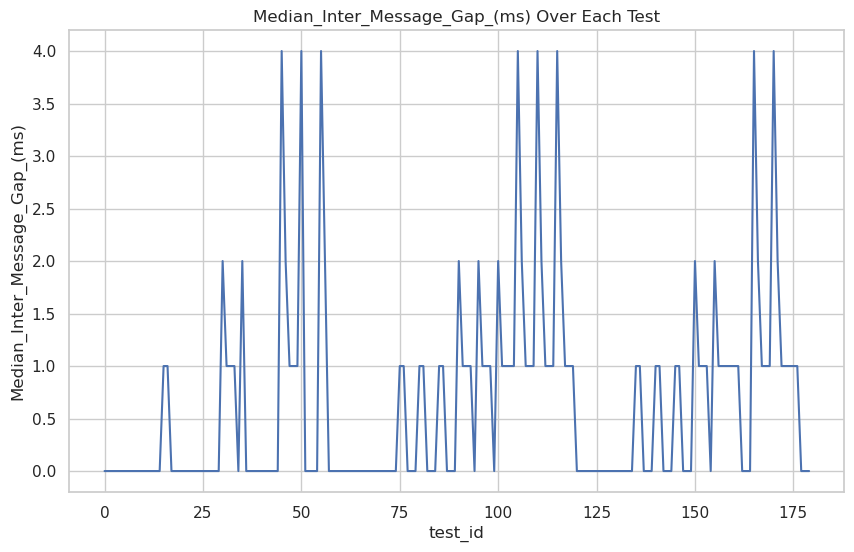

Max Median_Inter_Message_Gap_(ms): 4.0
Min Median_Inter_Message_Gap_(ms): 0.0
Correlation between test setup parameters with 'Median_Inter_Message_Gap_(ms)':

                Median_Inter_Message_Gap_(ms)
P2B_QoS                             -0.134927
A2B_QoS                              0.078116
Delay_(ms)                           0.576293
Instance_Count                      -0.455102


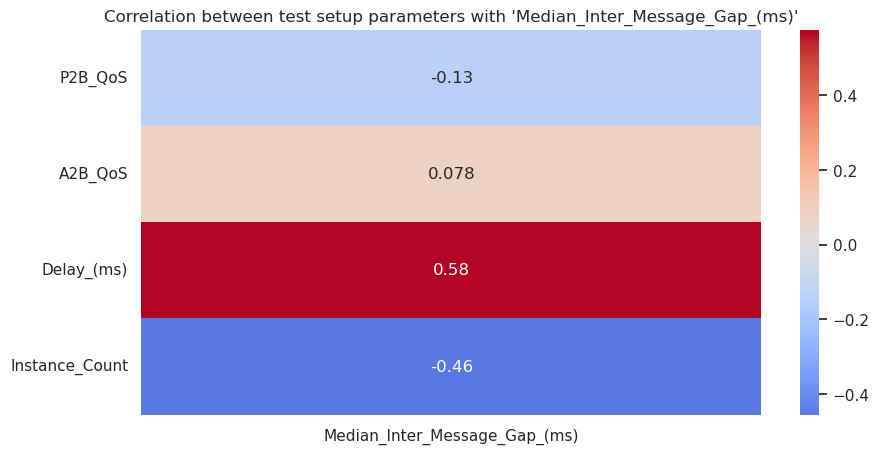

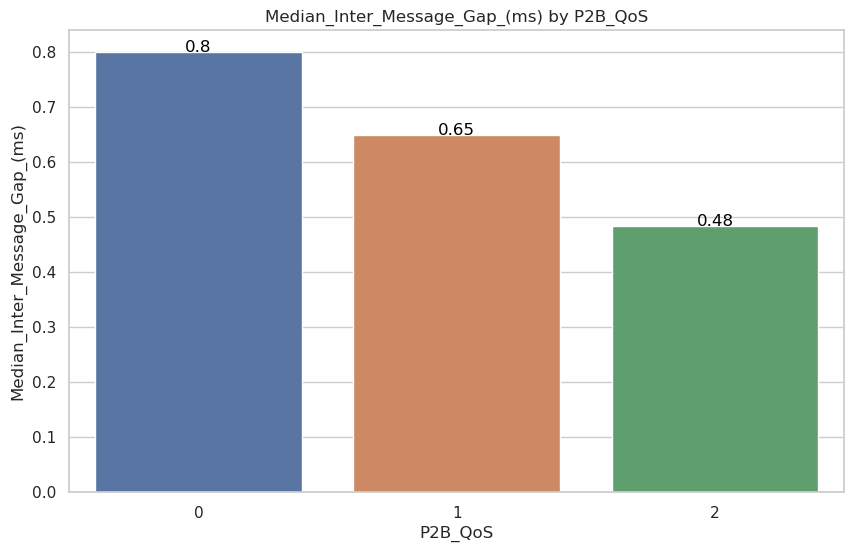

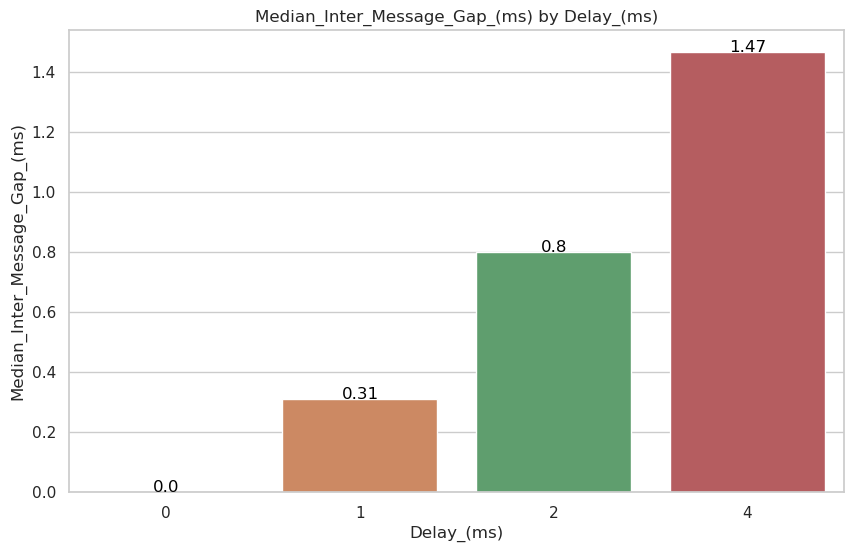

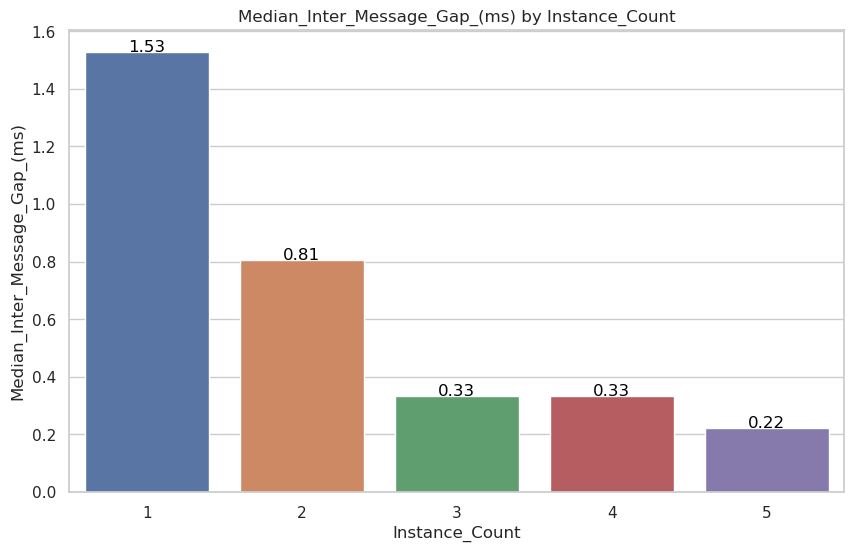

In [58]:
x = "test_id"
y = "Median_Inter_Message_Gap_(ms)"

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, data=data)
plt.title(f"{y} Over Each Test")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

print(f"Max {y}:", data[y].max())
print(f"Min {y}:", data[y].min())

target_column = y
correlation_matrix = generate_correlation_matrix(data, target_column)

print(f"Correlation between test setup parameters with '{target_column}':\n")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(f"Correlation between test setup parameters with '{target_column}'")
plt.show()

xs = ["P2B_QoS", "Delay_(ms)", "Instance_Count"]

for x in xs:
  # Aggregate the data by x
  aggregated_data = data.groupby(x).agg({
    'Total_Messages_Received': 'mean',
    'Expected_Messages_Received': 'mean',
    'Message_Loss_Rate_(%)': 'mean',
    'Out_of_Order_Message_Rate_(%)': 'mean',
    'Median_Inter_Message_Gap_(ms)': 'mean',
    'msg_rate_(msg/s)': 'mean',
  }).reset_index()
  # Bar Plot for Average Rate of Messages Received
  plt.figure(figsize=(10, 6))
  barplot = sns.barplot(x=x, y=y, data=aggregated_data)
  plt.title(f"{y} by {x}")
  plt.xlabel(x)
  plt.ylabel(y)
  # Add the actual numbers above the bars
  for index, row in aggregated_data.iterrows():
    barplot.text(row.name, row[y], round(row[y], 2), color='black', ha="center")
  plt.show()
